In [260]:
import csv
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from scipy.stats import norm
import os

csv_path = "score=0.01 生データ/7dayrawdata.csv"
f = open(csv_path, "r", encoding="utf8")
data = list(csv.reader(f))

x1 = np.array([])
x2 = np.array([])
x3 = np.array([])
x4 = np.array([])
detect_obj_num = 0

for i in tqdm(range(len(data))):
    cls_idxs = data[i][1].replace("[","")
    score = data[i][2].replace("[","")
    cls_idxs = cls_idxs.replace("]","")
    score = score.replace("]","")
    cls_idxs = cls_idxs.split()
    score = score.split()
    
    detect_obj_num += len(cls_idxs)
    for j, cls_id in enumerate(cls_idxs):
        try:
            cls_id = int(cls_id)
        except:
            cls_id = 0
        
        if cls_id == 1:
            x1 = np.append(x1, float(score[j]))
        if cls_id == 2:
            x2 = np.append(x2, float(score[j]))
        if cls_id == 3:
            x3 = np.append(x3, float(score[j]))
        if cls_id == 4:
            x4 = np.append(x4, float(score[j]))
print(detect_obj_num) 

100%|█████████████████████████████████████| 2080/2080 [00:01<00:00, 1258.59it/s]

156747


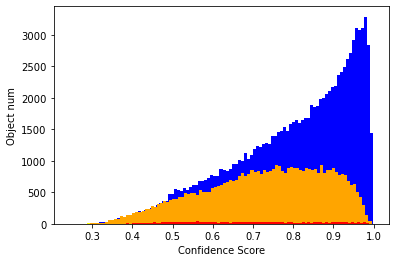

In [261]:
plt.xlabel("Confidence Score")
plt.ylabel("Object num")

plt.hist(x3, density=False, bins=100,color="blue")
plt.hist(x2, density=False, bins=100,color="yellow")
plt.hist(x4, density=False, bins=100,color="orange")
plt.hist(x1, density=False, bins=100,color="red")
plt.savefig(os.path.basename(csv_path)+"_hist.png")

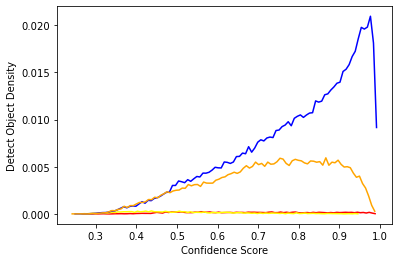

In [262]:
plt.xlabel("Confidence Score")
plt.ylabel("Detect Object Density")

histo, bins = np.histogram(x1,bins=100,density=False)
hist1 = histo/detect_obj_num
plt.plot(bins[:-1], hist1, color="red")

histo, bins = np.histogram(x2,bins=100,density=False)
hist2 = histo/detect_obj_num
plt.plot(bins[:-1], hist2, color="yellow")

histo, bins = np.histogram(x3,bins=100,density=False)
hist3 = histo/detect_obj_num
plt.plot(bins[:-1], hist3, color="blue")

histo, bins = np.histogram(x4,bins=100,density=False)
hist4 = histo/detect_obj_num
plt.plot(bins[:-1], hist4, color="orange")


plt.savefig(os.path.basename(csv_path)+"_norm.png")

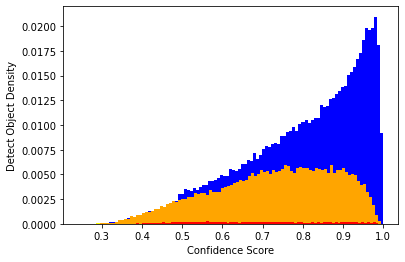

In [263]:
plt.xlabel("Confidence Score")
plt.ylabel("Detect Object Density")



histo, bins = np.histogram(x3,bins=100,density=False)
hist3 = histo/detect_obj_num
plt.hist(bins[:-1], bins=bins, weights=hist3, color="blue")



histo, bins = np.histogram(x2,bins=100,density=False)
hist2 = histo/detect_obj_num
plt.hist(bins[:-1], bins=bins, weights=hist2, color="yellow")

histo, bins = np.histogram(x4,bins=100,density=False)
hist4 = histo/detect_obj_num
plt.hist(bins[:-1], bins=bins, weights=hist4, color="orange")

histo, bins = np.histogram(x1,bins=100,density=False)
hist1 = histo/detect_obj_num
plt.hist(bins[:-1], bins=bins, weights=hist1, color="red")

plt.savefig(os.path.basename(csv_path)+"_norm_hist.png")